# <h1><center>Project 3: Regression</center></h1><br><h3><center>Chris Emm</center></h3>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

## Part I: Regression Analysis of Gapminder Data

### Exercise 1

In order to create a plot of life expectancy over time, we first need to scrape the data. We can then plot the data using the scatter() function, with the x value being the year column and the y value being the lifeExp column.

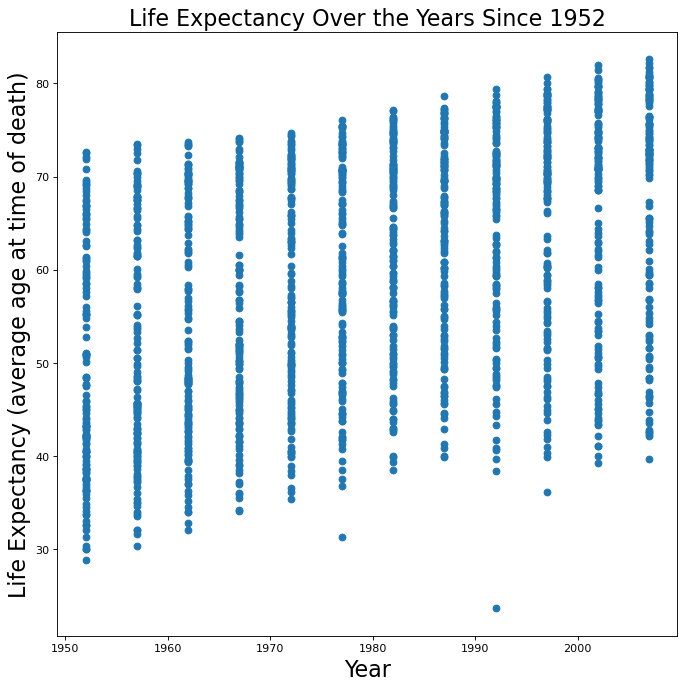

In [2]:
# Grab data from tsv file
data = pd.read_csv("mirror/gap.tsv", sep='\t')

# Change the figure size of the plot
plt.figure(figsize=(10, 10), dpi=80)

# Scatter the points with the year being the x-axis and the lifeExp being the y-axis
plt.scatter(data.year, data.lifeExp)

# Changing title and x/y axis labels
plt.title('Life Expectancy Over the Years Since 1952', fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Life Expectancy (average age at time of death)", fontsize=20)

# Show the plot
plt.show()

As you can see, I have made a scatter plot with the year as the x-axis and the life expectancy as the y-axis. There are a couple data points that, at first glace, appear to be outliers, however, the overall shape of the plot remains the same throughout. The distribution trends towards higher life expectancy as the years get close towards present day, which indicates that life expectancy and year have some linear, positive relationship.

### Question 1

The trend of life expectancy of time is definitively linear and it is increasing. From 1952 to the late 1980's, both the upper end and lower end of the scatter points were increasing, with the lower end increasing faster than the upper end. This results in this portion of the graph starting to shrink in variation. However, from 1990 to present, the lower end has pretty much remained stagnant whereas the upper end is now increasing faster. This portion of the plot is more spread out as a result.

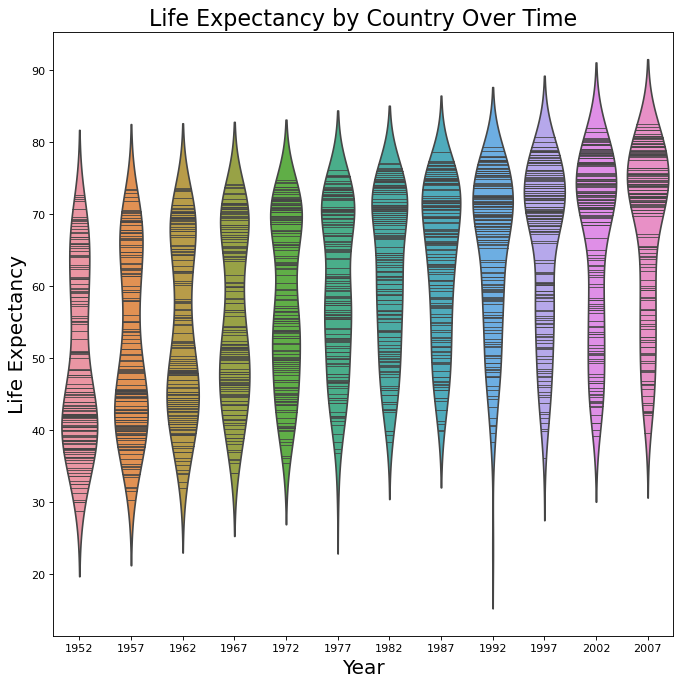

In [3]:
# Make violin plot and set all titles and axis labels
plt.figure(figsize=(10, 10), dpi=80)
ax = sb.violinplot(x = 'year', y = 'lifeExp', data = data, inner="stick")
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Life Expectancy", fontsize=18)
ax.set_title("Life Expectancy by Country Over Time", fontsize=20)

plt.show()

### Question 2

The skewness of this plot varies by years. From 1952-1967, the data was skewed towards higher life expectancies (meaning that less of the population data had higher life expectancies). From 1967-1972, the distribution was not skewed. Then, from 1972-present, the distribution was skewed towards lower life expectanies, thus implying that the majority of the data had higher expectancies.

For the first 20 years, the distribution was fairly symmetric around their respective centers. From 1972-present, however, the data was not symmetic arond their respective centers.

As for modality, the modal value did vary depending on the year, but the data was for each respective year was definitively unimodal around a point. It shows this by the width of the distribution. For example, the modal value for 1952 was somewhere around 40, because the width of the distribution was the largest at this point.

### Question 3

Intuitively, there should be a strong relationship between life expectancy and the year, however it should be more of an indirect relationship. Obviously, the year is not what makes life expectancy increase; it's simply that over time, Gross GDP increases, medical care increases, etc... which all lead to better living conditions, allowing people to live longer. So if you plot a regression line between the life expectancy and the year, there should be a positive correlation. All of this leads to the conclusion that you would inntuitively **reject the null hypothesis of there being no relationship.**

### Question 4

Since we do expect the linear model to fit the data, since there is a linear relationship between year and life expectancy, the residuals for the model should be randomly distributed about the y-value 0. Thus, the violin plot of the residuals would be expected to have a small range of residuals inside the violin plot.

### Question 5

A linear model should have residuals centered around zero. Residuals are simply the (actual value - predicted value), so if a linear model is accurate, the residual should be close to zero, meaning that a predicition is close to the actual value. Now, considering the violin aspect of the plot -- the width of the violin plot should be greatest around zero because this indicates that most of the data resides around zero, meaning that most of the calculated residuals are close to zero.

### Exercise 2

In order to create a linear regression model, we will need to use test and training data; we can do this by using the model_selection module from scikit learn. What this will do is split the data into 70% test data and 30% training data. The training data will train the model and then we will use the training data to fit the model, and then the model should be successfuly fitted to the overall data. To test this, we will show the predicted life expectancies for 1952 and 2007, as well as the mean life expectancies for thos same years. If this process was successful, the predicted data will be fairly close to the mean data.

In [4]:
# Create regression model
model = LinearRegression()

# x values are the year values. Needs to be a 2D array,, so we must reshape it
x = data['year'].values.reshape(-1,1)

# y values are the life expectancy values.
y = data['lifeExp'].values

# Split the data (70-30) into testing and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.3)

# Fit the model to the training data
model = model.fit(x_train, y_train)

# Print the linear regression equation (y = mx + b)
print('Intercept: \n', model.intercept_)
print('\nCoefficients: \n', model.coef_)

# Predict the life expectancy for 1952
lifeExp_1950 = model.coef_[0] * 1952 + model.intercept_
print(f'\nPredicted life expectancy in 1952: {lifeExp_1950}')

# Take the mean life expectancy for 1952
print(f'Mean life expectancy in 1952: {data[data.year == 1952].lifeExp.mean()}')

# Predict the life expectancy for 2007
lifeExp_2007 = model.coef_[0] * 2007 + model.intercept_
print(f'\nPredicted life expectancy in 2007: {lifeExp_2007}')

# Take the mean life expectancy for 2007
print(f'Mean life expectancy in 2007: {data[data.year == 2007].lifeExp.mean()}')

Intercept: 
 -598.7905344388258

Coefficients: 
 [0.33198859]

Predicted life expectancy in 1952: 49.2511959638274
Mean life expectancy in 1952: 49.05761971830987

Predicted life expectancy in 2007: 67.51056849054146
Mean life expectancy in 2007: 67.00742253521126


As you can see, the model was able to accurately predict the life expectancy to within half of a year, so we can consider this model to be strong.

### Question 6

According to our model, life expectancy changes, on average, by 33% of a year. So, on average, each year, life expectancy increases by about 4 months.

### Question 7

In order to be able to reject or accept the null hypothesis, we should calculate the p-value for the relationship between the year variable and the lifeExp variable. A low p-value (closer to 0) indicates that the null hypothesis should be rejected and that the test values are statistically significant. A high p-value indicates that the data is not statistically significant and that it is possible there is no relationship between the variables.

In [5]:
# pearsonr() returns a 2-tuple of (Pearson’s correlation coefficient, Two-tailed p-value)
# So, by accessing index 1, I am printing the p-value between the year and lifeExp variables
print(f'p-value: {pearsonr(data.year, data.lifeExp)[1]}')

p-value: 7.546794625620172e-80


After calculating the p-value, we got a result that is practically zero, and thus our data is statistically significant and we can therefore reject the null hypothesis that there is no relationship between year and life expectancy.

### Exercise 3

Using the model from exercise 2, we are going to calculate the residuals, and plot them against the year.  Below is the code to perform the calculations and plotting.

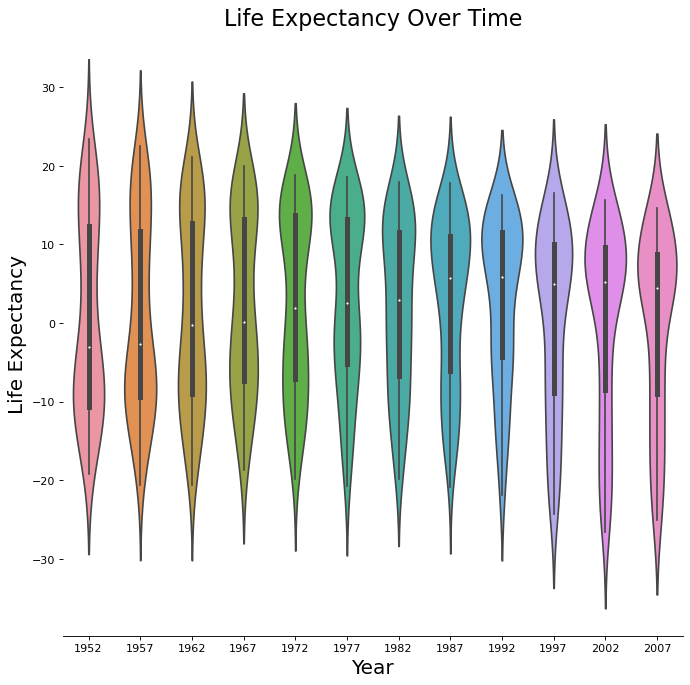

In [6]:
# Have the linear model predict for each year value in the dataset
predictions = model.predict(x_test)

# Calculate the residual (actual - predicted)
residuals = np.subtract(y_test, predictions)

# Create new data set with the residuals and their respective years
residual_data = pd.DataFrame({'residuals':residuals, 'year': x_test.flatten()})

# Make violin plot with the new dataset from above
plt.figure(figsize=(10, 10), dpi=80)
ax = sb.violinplot(x = 'year', y = 'residuals', data = residual_data)

# Make the plot have a box and whisker style plot
sb.despine(left=True)

# Set all titles and axis labels
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Life Expectancy", fontsize=18)
ax.set_title("Life Expectancy Over Time", fontsize=20)

# Show the plot
plt.show()

As you can see, the a violin plot of the residuals were plotted for each year in the dataset. The plots for each year are centered around zero, however, the mean flucatuates a little above and below zero through the duration of the year (1952-2007). But, because the residuals are close to zero for the most part, we can say that our model is accurate at predicting the life expectancy, to some extent. However, as you will see in later exercises, our model can be even stronger.

### Question 8

Yes, the plot above does match the expectations that I gave in question 4, as the residuals for the most part, are generally centered around 0. Residuals around centered around 0 indicates that the linear regression model is accurately predicting the values because residuals are simply actual value subtracted from the predicted value. A value near 0 means that there the actual and predicted values are close to each other. This further indicates that the linear regression model that was created above is a strong model.

### Exercise 4

In order to create a plot of residuals for a variable that has string values (continent names like 'Africa'), I had to replace the name of each continent with a integer value. Specifically, I decided to map Americas to 0, Asia to 1, Europe to 2, Oceania to 3, and Africa to 4. From there, I created a linear regression model based on the life expectancy values for each continent. Then, to create the residual list, I used numpy to make a list based on the result of me subtracting the predicted life expectancies from each actual value life expectancies. So, element 1 in my resultinf list was the subtraction of element 1 in the predicted list and element 1 in the actual list, and so on... I then made a violin plot of the residuals for each continent and then changed the xticks for the plot back to the original continent names for ease of reading.

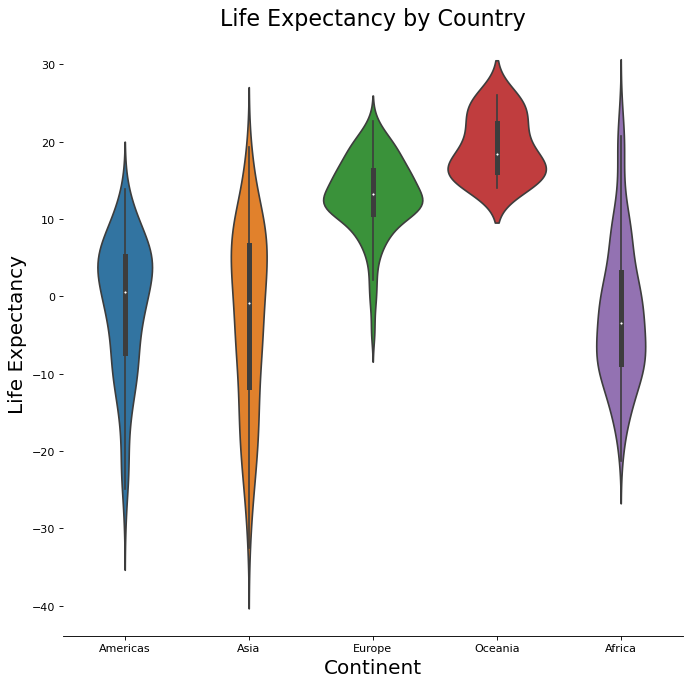

In [7]:
# Create regression model
model = LinearRegression()

# Can't do regression on strings at the same time -- replacing strings with corresponding values (0, 1, 2, 3)
continents_data = data.replace('Americas', 0)

continents_data = continents_data.replace('Asia', 1)
continents_data = continents_data.replace('Europe', 2)
continents_data = continents_data.replace('Oceania', 3)
continents_data = continents_data.replace('Africa', 4)

# x values are the continent values. Needs to be a 2D array,, so we must reshape it
x = continents_data['continent'].values.reshape(-1,1)

# y values are the life expectancy values.
y = continents_data['lifeExp'].values

# Split the data (70-30) into testing and training data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.3)

# Fit the model to the training data
model = model.fit(x_train, y_train)

# Have the linear model predict for each year value in the dataset
predictions = model.predict(x_test)

# Calculate the residual (actual - predicted)
residuals = np.subtract(y_test, predictions)

# Create new data set with the residuals and their respective years
residual_data = pd.DataFrame({'residuals':residuals, 'continent': x_test.flatten()})

# Make violin plot with the new dataset from above
plt.figure(figsize=(10, 10), dpi=80)
ax = sb.violinplot(x = 'continent', y = 'residuals', data = residual_data)

# Make the plot have a box and whisker style plot
sb.despine(left=True)

# Set all titles and axis labels
ax.set_xlabel("Continent", fontsize=18)
ax.set_ylabel("Life Expectancy", fontsize=18)
ax.set_title("Life Expectancy by Country", fontsize=20)

# Change Labels for x-axis
x = ['Americas', 'Asia', 'Europe', 'Oceania', 'Africa']
ax.set_xticklabels(x)

# Show the plot
plt.show()

As you can see, the a violin plot of the residuals were plotted for each continent in the dataset. The plots are very different depending on whihc continent you are looking at. For example, for the Americas, Asia, and Africa, the residuals are extremely close to zero, meaning our model is very accurate at predicting the life expectancy for these continents. However, for Europe and Oceania, the residuals are above 10, which indicates our model is under-predicting the life expectancy for countries in these continents. For an ideal model, we would be looking for something that is able to accurately predict values for *all* groups, not just for a couple groups.

### Question 9

For the Americas, Asia, and Africa, the mean residual lies relatively near 0, meaning that, on average, our model accurately predicts life expectancy for these continents. However, for Europe and Oceania, both mean residuals lie above +10, indicating that our model is underpredicting the life expectantcy based on these continents. One explanation for Oceania is that there is a low population for the data with only 19 countries having results displayed. As for Europe, there are 268 countries, so population size is not an issue. The wide variability is possibly due to the varying GDP levels across Europe, because Europe is a large continent with a variety of different countries, all with varying levels of GDP. Therefore, there simply might be too much variation for Europe for our model to be able to accurately predict the life expectancy for every country across Europe.

As a result, we would have to conclude that life expectancy is not completely dependant on continent, due to its unreliableness. Performing a regression analysis of life expectancy across time would be stronger than performing a regression analysis of life expectancy by continent.

### Exercise 5

In order to plot life expectancy by year for each continent, I chose to make 5 different axes, with each axis representing one of the continents. I also plotted the regression line for each axis, which I completed by creating a linear regression model, splitting the data into training points and testing points, and the fitteing the model to the training data. Once fitted, I could make predictions using the test data. I then ploted a line with the x values being the test data and the y values being the predicted values.

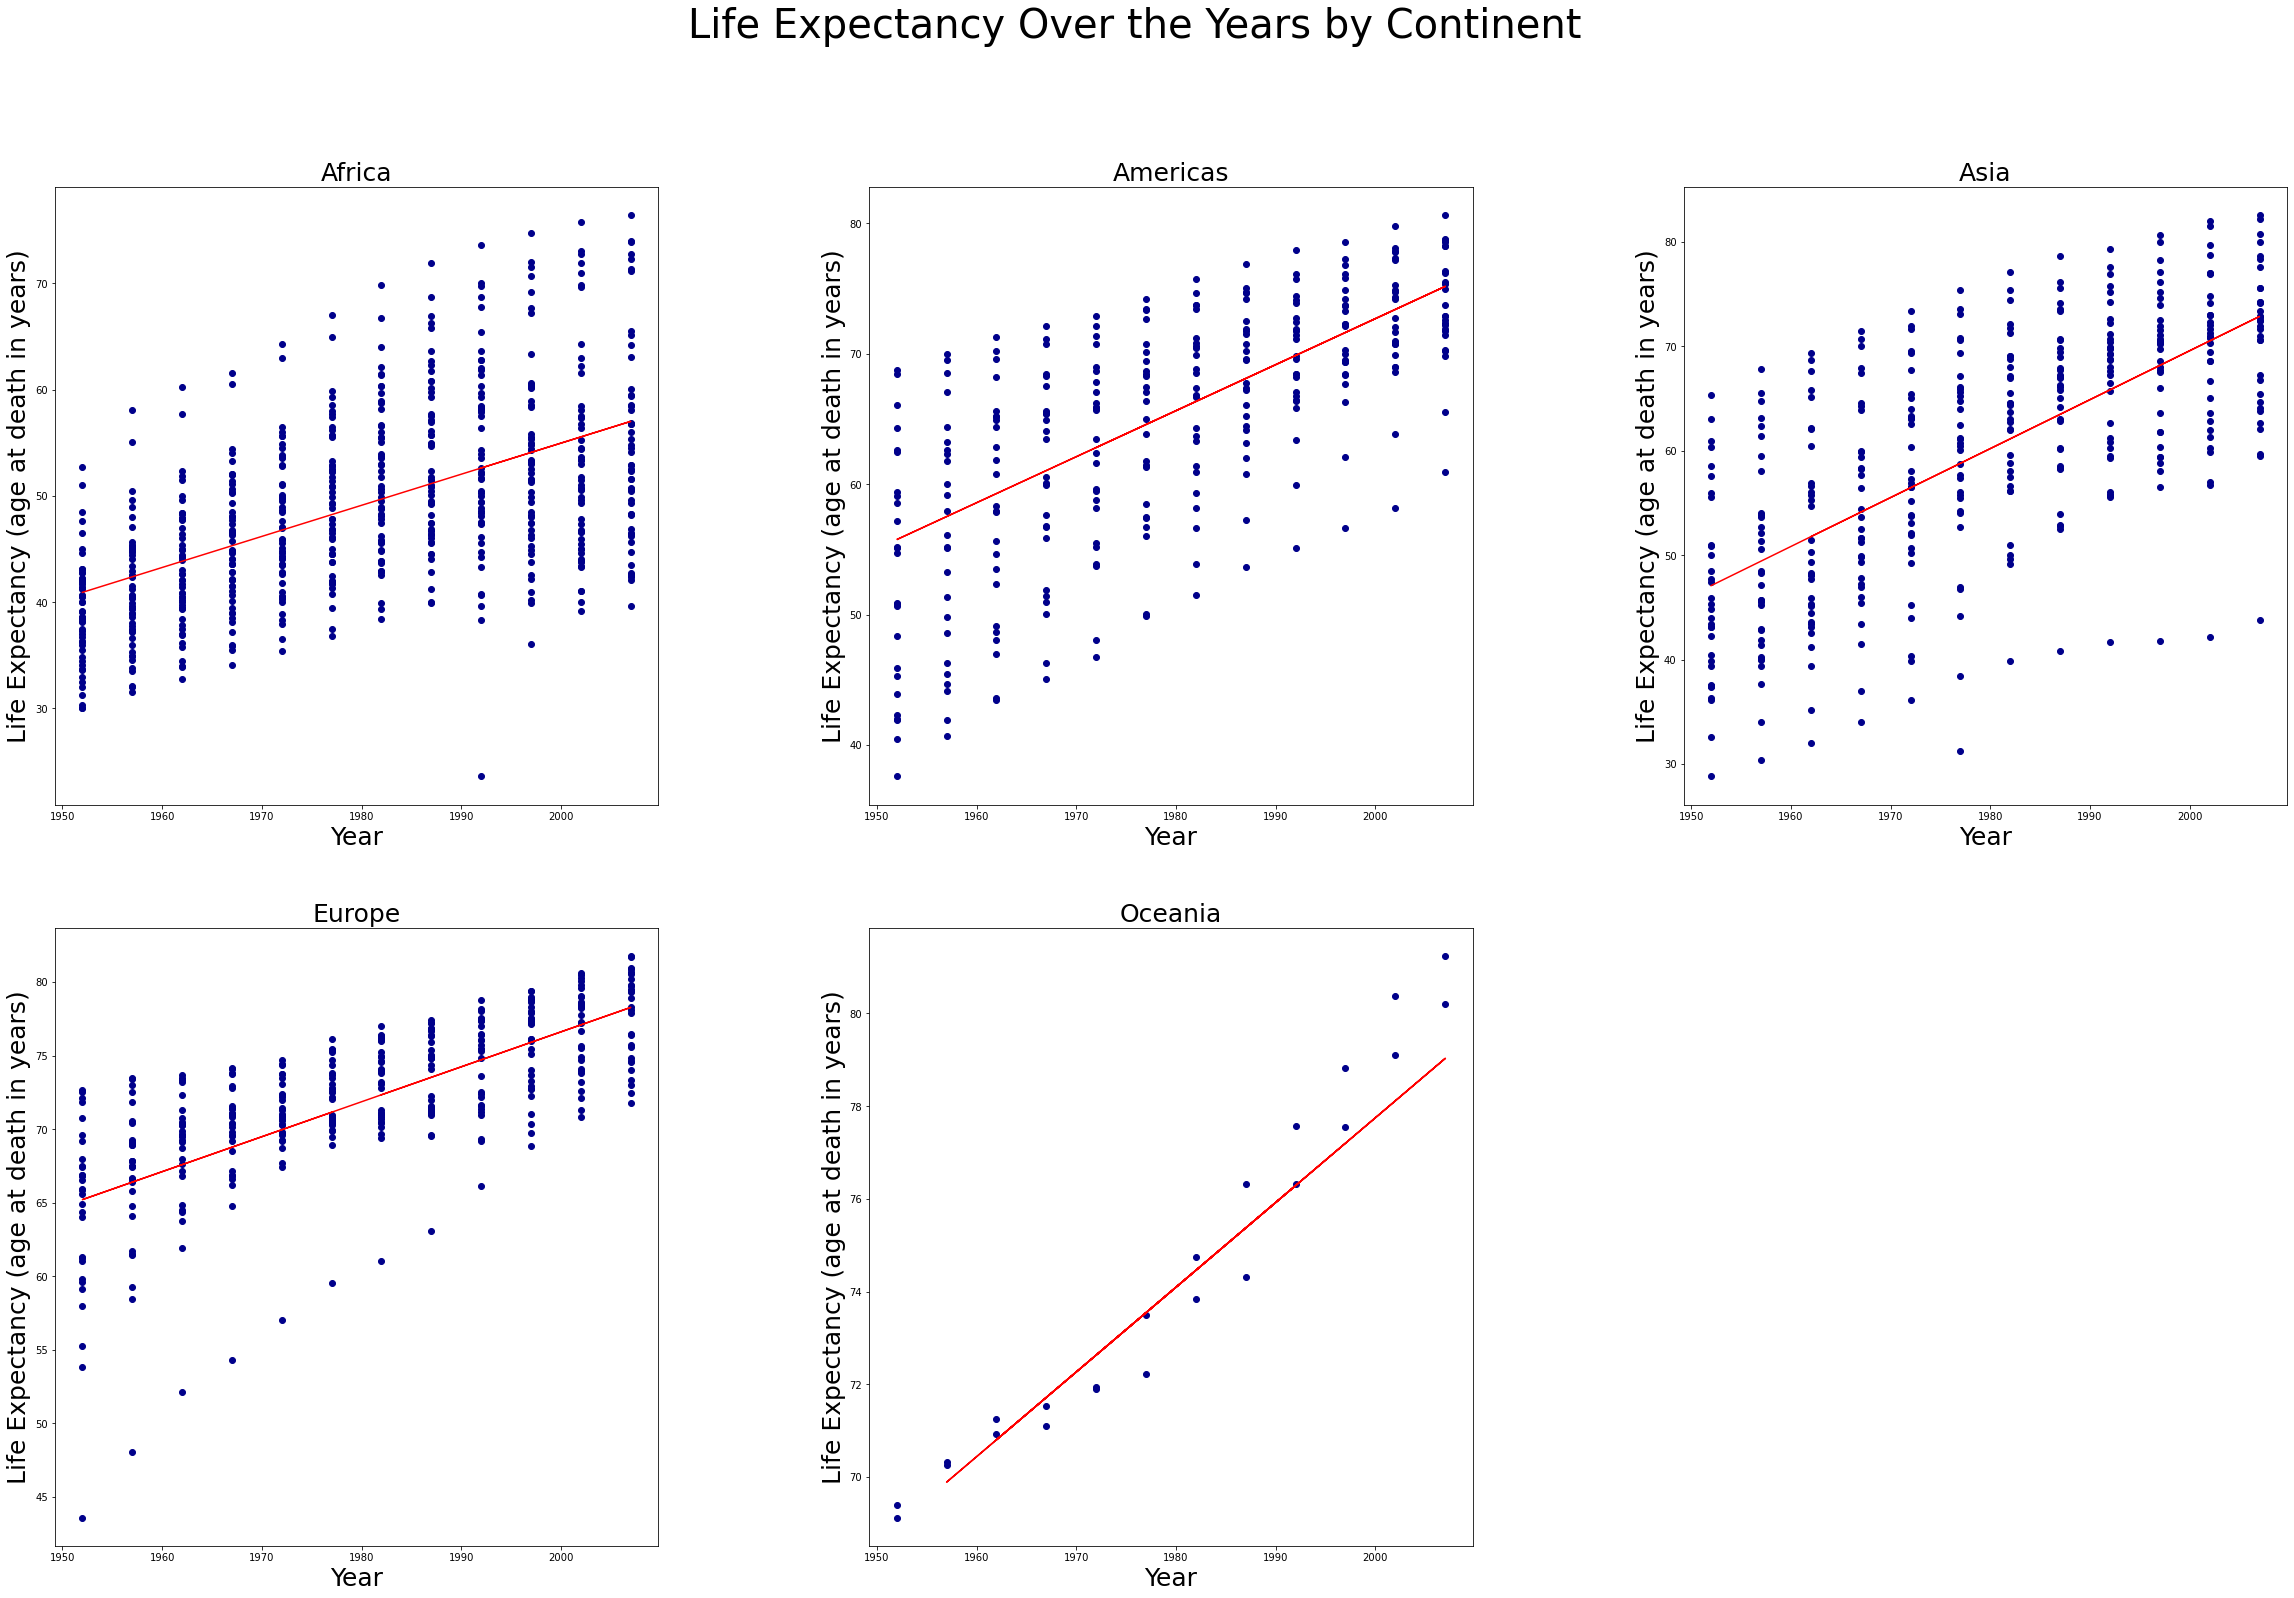

In [8]:
continents = dict(list(data.groupby('continent')))

# Set up plot for all 5 dataframes
fig, ax = plt.subplots(2, 3)
fig.subplots_adjust(wspace=.35)
fig.set_figheight(25)
fig.set_figwidth(40)
fig.delaxes(ax[1,2])
fig.suptitle("Life Expectancy Over the Years by Continent", fontsize=40)

# Plot Africa
plt.sca(ax[0,0])
plt.scatter(continents['Africa'].year, continents['Africa'].lifeExp, c = 'DarkBlue')
plt.gca().set_title('Africa', fontsize=25)
plt.gca().set_xlabel('Year', fontsize=25)
plt.gca().set_ylabel('Life Expectancy (age at death in years)', fontsize=25)

# Plot the regression line
africa_model = LinearRegression()
x = continents['Africa'].year.values.reshape(-1,1)
y = continents['Africa'].lifeExp.values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.3)
africa_model = africa_model.fit(x_train, y_train)
predictions = africa_model.predict(x_test)
plt.plot(x_test, predictions, color='red')

# Plot Americas
plt.sca(ax[0,1])
plt.scatter(continents['Americas'].year, continents['Americas'].lifeExp, c = 'DarkBlue')
plt.gca().set_title('Americas', fontsize=25)
plt.gca().set_xlabel('Year', fontsize=25)
plt.gca().set_ylabel('Life Expectancy (age at death in years)', fontsize=25)

# Plot the regression line
americas_model = LinearRegression()
x = continents['Americas'].year.values.reshape(-1,1)
y = continents['Americas'].lifeExp.values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.3)
americas_model = americas_model.fit(x_train, y_train)
predictions = americas_model.predict(x_test)
plt.plot(x_test, predictions, color='red')

# Plot Asia
plt.sca(ax[0,2])
plt.scatter(continents['Asia'].year, continents['Asia'].lifeExp, c = 'DarkBlue')
plt.gca().set_title('Asia', fontsize=25)
plt.gca().set_xlabel('Year', fontsize=25)
plt.gca().set_ylabel('Life Expectancy (age at death in years)', fontsize=25)

# Plot the regression line
asia_model = LinearRegression()
x = continents['Asia'].year.values.reshape(-1,1)
y = continents['Asia'].lifeExp.values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.3)
asia_model = asia_model.fit(x_train, y_train)
predictions = asia_model.predict(x_test)
plt.plot(x_test, predictions, color='red')

# Plot Europe
plt.sca(ax[1,0])
plt.scatter(continents['Europe'].year, continents['Europe'].lifeExp, c = 'DarkBlue')
plt.gca().set_title('Europe', fontsize=25)
plt.gca().set_xlabel('Year', fontsize=25)
plt.gca().set_ylabel('Life Expectancy (age at death in years)', fontsize=25)

# Plot the regression line
europe_model = LinearRegression()
x = continents['Europe'].year.values.reshape(-1,1)
y = continents['Europe'].lifeExp.values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.3)
europe_model = europe_model.fit(x_train, y_train)
predictions = europe_model.predict(x_test)
plt.plot(x_test, predictions, color='red')

# Plot Oceania
plt.sca(ax[1,1])
plt.scatter(continents['Oceania'].year, continents['Oceania'].lifeExp, c = 'DarkBlue')
plt.gca().set_title('Oceania', fontsize=25)
plt.gca().set_xlabel('Year', fontsize=25)
plt.gca().set_ylabel('Life Expectancy (age at death in years)', fontsize=25)

# Plot the regression line
oceania_model = LinearRegression()
x = continents['Oceania'].year.values.reshape(-1,1)
y = continents['Oceania'].lifeExp.values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size=0.3)
oceania_model = oceania_model.fit(x_train, y_train)
predictions = oceania_model.predict(x_test)
plt.plot(x_test, predictions, color='red')

plt.show()

As you can see above, I was able to plot life expectancy over the years and plot a line of regression for each respective continent. From the plot, we can see that regardless of the continent, life expectancy has no doubtedly increase over the years since 1952. What these plots allow us to see is a visual of which continent has been increasing the most over the year. For example, countries in Asia and Africa have increased their life expectancy by a signifcant margin since 1952, whereas countries in Oceania have increased at a slower rate. Now, it might look like Oceania has increased at a drastic rate, however, looking at the y-axis values, you see that the range is only 10 years, so the steeper line is only due to the fact that the rage of values is much smaller than the range of values for Asia (30-80) and Africa (30-70).

### Question 10

The various plots have radically different regression coefficients for their respective linear models. For refercence, below are the respective coefficients:

In [9]:
print(f'Africa: {africa_model.coef_[0]}')
print(f'Americas: {americas_model.coef_[0]}')
print(f'Asia: {asia_model.coef_[0]}')
print(f'Europe: {europe_model.coef_[0]}')
print(f'Oceania: {oceania_model.coef_[0]}')


Africa: 0.29259060842339535
Americas: 0.3530557690556418
Asia: 0.46892002810532835
Europe: 0.2375986203193093
Oceania: 0.18280669144981398


As you can see above, the coefficients are very different for each continent. This indicates that there is some other variable impacting the life expectancy (e.g., gdp, year, etc...) and therefore we should include an interaction term to account for the differences that continents don't account for.

### Exercise 6

In order to create a linear regression model with interaction terms, we need to make the x-value be an array for the continent and year values, and the y-value be the life expectancy. Then, we can use the PolynomialFeatures() fuction from SKLearn, to use x as the interaction term. Then, we can fit our model using the interaction term as our x and the life expectancy as our y. We then print out the intercept and coefficients.

In [10]:
x = continents_data.values[:, 1:3]
y = continents_data.values[:, 3]

# Creating interaction term
interaction = PolynomialFeatures(degree=3, include_bias=False, interaction_only=True)
x_inter = interaction.fit_transform(x)

# Create linear regression
model = LinearRegression()

# Fit the linear regression
model = model.fit(x_inter, y)

print('Intercept: \n', model.intercept_)
print('\nCoefficients: \n', model.coef_)

Intercept: 
 -706.9564894607744

Coefficients: 
 [ 5.61081788e+01  3.91537519e-01 -3.03582545e-02]


### Question 11

In order to calculate the p-value of our coefficients, we need to use the statsmodels.api module, which allows us to create a model that we can fit using our x and y values (x is still the array of year and continent values, while y is the lief expectancy). OLS() will create our model and we will fit it, which will provide us with a fitted model that has information associated to it such as p-value. We can then just ouput the calculated p-values for the year and continent. If the p-value is high, that means our null hypothesis of there being no relation between year and continent having an impact on life expectancy is likely true. If the p-values are close to 0, then the null hypothesis is rejected, and the coefficients do have an impact on life expectancy.

In [11]:
x = continents_data[['year', 'continent']]
y = continents_data['lifeExp']
x = sm.add_constant(x)
pval_model = sm.OLS(y, x).fit()
pval_model.pvalues[1:3]

year         2.807972e-106
continent    5.373488e-124
dtype: float64

Both the year and continent have p-values of 0. This indicates that the data is statistically significant and that we reject the null hypothesis of the year and continent having no influence on life expectancy. 

### Question 12

I supplied this code above from exercise 5 and question 10. In order to get the coefficients (slope) for each distinct continent, I created a linear regression model based on life expectancy by year for each continent. Below are the coefficients:

In [12]:
print(f'Africa: {africa_model.coef_[0]}')
print(f'Americas: {americas_model.coef_[0]}')
print(f'Asia: {asia_model.coef_[0]}')
print(f'Europe: {europe_model.coef_[0]}')
print(f'Oceania: {oceania_model.coef_[0]}')

Africa: 0.29259060842339535
Americas: 0.3530557690556418
Asia: 0.46892002810532835
Europe: 0.2375986203193093
Oceania: 0.18280669144981398


If the continent is Africa, then the life expectancy will increase by .293 every year.
<br />If the continent is Americas, then the life expectancy will increase by .353 every year.
<br />If the continent is Asia, then the life expectancy will increase by .469 every year.
<br />If the continent is Europe, then the life expectancy will increase by .238 every year.
<br />If the continent is Oceania, then the life expectancy will increase by .183 every year.

### Exercise 7

Using the model from exercise 6, I used the interaction terms to predict the expected life expectancy values. Then, from the predictions, I calculated the residuals (actual life expectancy - predicted life expectancy). The residuals were then plotted in a violin plot for each year that the residuals were associated with.

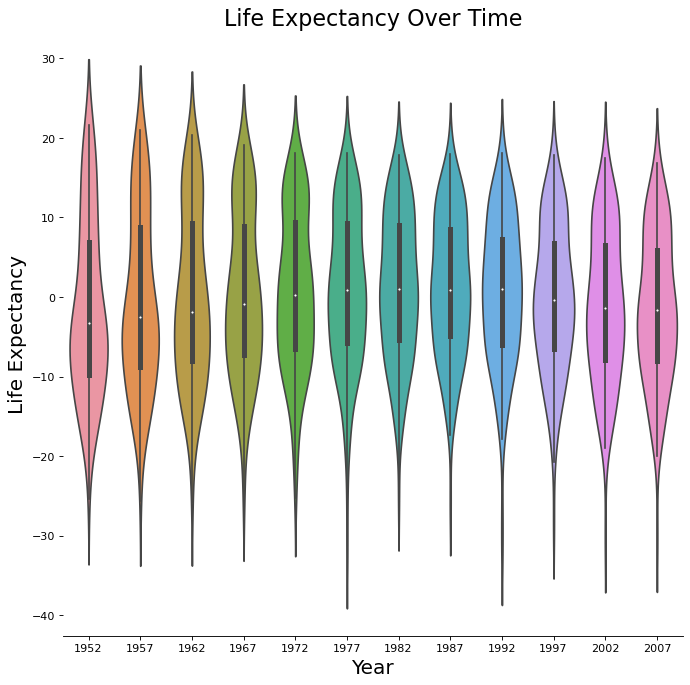

In [13]:
# Have the linear model predict for each year value in the dataset
predictions = model.predict(x_inter)

# Calculate the residual (actual - predicted)
residuals = np.subtract(y, predictions)

# Create new data set with the residuals and their respective years
residual_data = pd.DataFrame({'residuals':residuals, 'year': continents_data.values[:,2]})
residual_data.residuals = pd.to_numeric(residual_data.residuals, errors = 'coerce')
residual_data.year = pd.to_numeric(residual_data.year, errors = 'coerce')

# Make violin plot with the new dataset from above
plt.figure(figsize=(10, 10), dpi=80)
ax = sb.violinplot(x = 'year', y = 'residuals', data = residual_data)

# Make the plot have a box and whisker style plot
sb.despine(left=True)

# Set all titles and axis labels
ax.set_xlabel("Year", fontsize=18)
ax.set_ylabel("Life Expectancy", fontsize=18)
ax.set_title("Life Expectancy Over Time", fontsize=20)

# Show the plot
plt.show()

The residuals are well-centered around 0, meaning that the model is accurately predicting the life expectancy based on the interaction terms. In fact, over time, the model became more accurate at predicting the life expectancy, as the residuals became even more centered around 0, and there is less outlying values far from 0. Compared to the original linear model, this model is more accurate at predicting life expectancy, which further indicates that there are multiple factors that impact life expectancy other than just year or continent -- the model works best when accounting for all of the factors together than when it account for one factor at a time.

## Part II: Classification

### Algorithm 1: Linear Discriminant Analysis

I am going to use the iris dataset from SKLearn. The goal of this activity is to be able to predict the correct species of the plant, using the data for sepal length, sepal width, petal length, and petal width. Below is the code that pulls the data from the iris dataset and creates a dataframe with the columns sepal length (cm), sepal width (cm), petal length (cm), petal width (cm), and species.

In [14]:
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = load_iris()

# Code to tuurn data into dataframe came from:
# https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
iris_dataframe = pd.DataFrame(data= np.c_[iris.data, iris.target], columns = iris.feature_names + ['species'])

# Add name of species to dataframe
iris_dataframe.species = iris_dataframe.species.replace(0, 'setosa')
iris_dataframe.species = iris_dataframe.species.replace(1, 'versicolor')
iris_dataframe.species = iris_dataframe.species.replace(2, 'virginica')

iris_dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Below, I perform the Linear Discriminant Analysis. For each plant, I output the predicted species that is calculated from the Linear Discriminant Analysis and I output the actual species that is recorded with the data that was used for each plant. I also count each time that the analysis predicted the wrong species and display it at the bottom of the output.

In [15]:
x = iris_dataframe.iloc[:, 0:4].values
y = iris_dataframe.iloc[:, 4].values

# Splitting data into test and train data (holdout validation)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.3)

# Create the Linear Discriminant Analysis model
model = LinearDiscriminantAnalysis()

# Fit the model to the training data
model = model.fit(x_train, y_train)

count = 0
for i in range(0, len(x_test)):
    # Make the prediction of species using the model
    prediction = model.predict([x_test[i]])[0]
    
    # Keep track and output whether the prediction was correct
    if prediction != y_test[i]:
        print(f'**Predicted Species: {prediction}, Actual Species: {y_test[i]}**')
        count += 1
    else:
        print(f'Predicted Species: {prediction}, Actual Species: {y_test[i]}')
        
# Print the number of incorrect predictions
print(f'\nNumber of species predicted incorrectly: {count}/{len(x_test)}')

Predicted Species: virginica, Actual Species: virginica
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: setosa, Actual Species: setosa
Predicted Species: virginica, Actual Species: virginica
Predicted Species: setosa, Actual Species: setosa
Predicted Species: virginica, Actual Species: virginica
Predicted Species: setosa, Actual Species: setosa
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: virginica, Actual Species: virginica
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: setosa, Actual Species: setosa
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: versicolor, Actual Species: versico

As you can see, the Linear Discriminant Analysis model was very accurate, as it only got one plant species incorrect out of all 45 plants that were in the database. As a result, this model appears to be highly accurate at classifying the data into the correct categories.

### Algorithm 2: k-NN classification

For the second algorithm, I am going to use the k-NN classification algorithm so that I can compare the differences in accuracy between this algorithm and the Linear Discriminant Analysis algorithm I used above. I am going to use the same exact data to train and test, so that there are no differences in data being tested. So, I am just going to reuse the x_train, x_test, y_train, y_test variables created from the train_test_split() function in the last section of code. The only difference in the code is using the KNeighborsClassifier() function. I did mess around with the n_neighbors value, but ultimately found that uisng a value close to 3 was best for the most accurate results.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Create the k-NN classification model
model = KNeighborsClassifier(n_neighbors=3)

# Fit the model to the training data from the last code section
model = model.fit(x_train, y_train)

count = 0
for i in range(0, len(x_test)):
    # Make the prediction of species using the model
    prediction = model.predict([x_test[i]])[0]
    
    # Keep track and output whether the prediction was correct
    if prediction != y_test[i]:
        print(f'**Predicted Species: {prediction}, Actual Species: {y_test[i]}**')
        count += 1
    else:
        print(f'Predicted Species: {prediction}, Actual Species: {y_test[i]}')
        
# Print the number of incorrect predictions
print(f'\nNumber of species predicted incorrectly: {count}/{len(x_test)}')

Predicted Species: virginica, Actual Species: virginica
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: setosa, Actual Species: setosa
Predicted Species: virginica, Actual Species: virginica
Predicted Species: setosa, Actual Species: setosa
Predicted Species: virginica, Actual Species: virginica
Predicted Species: setosa, Actual Species: setosa
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: virginica, Actual Species: virginica
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: setosa, Actual Species: setosa
Predicted Species: versicolor, Actual Species: versicolor
Predicted Species: versicolor, Actual Species: versico

As you can see, the k-NN classification algorithm had the same level of accuracy as the Linear Discriminant Analysis algorithm, as they both only missed 1 of the 45 classifications. In fact, they were incorrect in guessing the classification of the exact same plant, so it might be possible that this plant is an outlier, causing the prediction for both models to be wrong, but we would need to do further testing to determine if that is the case. As for right now, we have determined both of these models used in Part II to be highly accurate at predicting plant species based on sepal length, sepal width, petal length, and petal width. 